# 教師あり学習の演習

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import japanize_matplotlib
%matplotlib inline

In [11]:
df = pd.read_excel('cycle_training.xlsx')
df

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972


これでデータのダウンロードができました。

### 0.2 データ・演習についての説明

今回は天気や日時に関するデータから、レンタサイクルのレンタル数(df_cycleの'count'列)について予測するモデルを作っていただきます。

各列の意味は次のようになっています。
- Instant: 日時固有のID
- Season: 季節	
- year: 年
- dteday: 年月日
- mnth: 月
- holiday: 祝日か否か
- weekday: 曜日
- WorkingDay: 営業日か否か
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数



これらを用いて2011年のデータを学習させ、2012年のcountを予測するモデルを作成してください。

In [ ]:
from sklearn.model_selection import train_test_split
# 線形回帰
from sklearn.linear_model import LinearRegression
# 評価指標
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [ ]:
df.head()

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
# 統計量
df.describe()

,year,mnth,weekday,temp,atemp,hum,windspeed,count
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2011.311321,5.503774,2.994340,0.472715,0.454910,0.626415,0.196445,3900.515094
std,0.463471,3.361770,2.003297,0.179219,0.160375,0.151088,0.077884,1662.358881
min,2011.000000,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,2011.000000,3.000000,1.000000,0.323541,0.322271,0.507083,0.138846,2603.750000
50%,2011.000000,5.000000,3.000000,0.463750,0.457063,0.626250,0.189067,4062.000000
75%,2012.000000,8.000000,5.000000,0.628125,0.585082,0.738125,0.237566,4888.500000
max,2012.000000,12.000000,6.000000,0.849167,0.840896,0.972500,0.507463,8362.000000


In [ ]:
# 欠損値確認
df.isna().sum()

Instant       0
Season        0
year          0
dteday        0
mnth          0
holiday       0
weekday       0
WorkingDay    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
count         0
dtype: int64

In [ ]:
# データの確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Instant     530 non-null    object        
 1   Season      530 non-null    object        
 2   year        530 non-null    int64         
 3   dteday      530 non-null    datetime64[ns]
 4   mnth        530 non-null    int64         
 5   holiday     530 non-null    object        
 6   weekday     530 non-null    int64         
 7   WorkingDay  530 non-null    object        
 8   weathersit  530 non-null    object        
 9   temp        530 non-null    float64       
 10  atemp       530 non-null    float64       
 11  hum         530 non-null    float64       
 12  windspeed   530 non-null    float64       
 13  count       530 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 58.1+ KB


In [ ]:
df['dteday'] = df['dteday'].astype(str)
df['dteday'] = df['dteday'].apply(lambda x: x[:10])
df['day'] = df['dteday'].apply(lambda x: int(x[-2:]))
df

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count,day
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985,1
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801,2
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349,3
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562,4
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498,9
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598,10
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664,11
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972,12


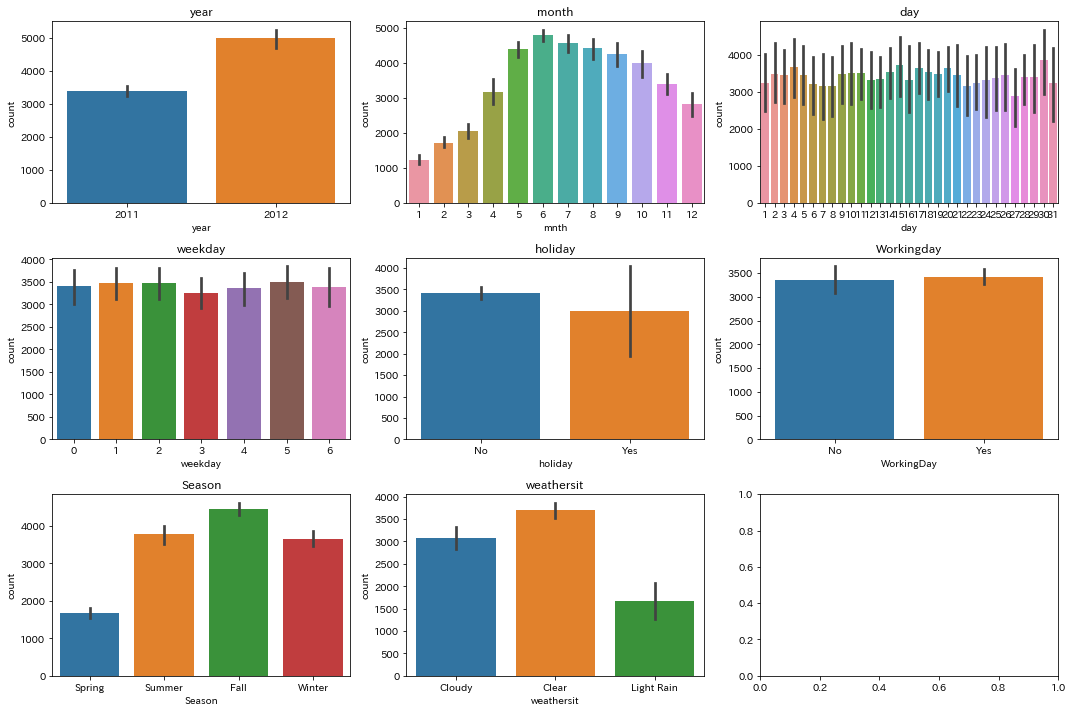

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.barplot(x='year', y='count', data=df, ax=axes[0, 0])
sns.barplot(x='mnth', y='count', data=df.iloc[:365], ax=axes[0, 1])
sns.barplot(x='day', y='count', data=df.iloc[:365], ax=axes[0, 2])
sns.barplot(x='weekday', y='count', data=df.iloc[:365], ax=axes[1, 0])
sns.barplot(x='holiday', y='count', data=df.iloc[:365], ax=axes[1, 1])
sns.barplot(x='WorkingDay', y='count', data=df.iloc[:365], ax=axes[1, 2])
sns.barplot(x='Season', y='count', data=df.iloc[:365], ax=axes[2, 0])
sns.barplot(x='weathersit', y='count', data=df.iloc[:365], ax=axes[2, 1])
axes[0, 0].set(title='year')
axes[0, 1].set(title='month')
axes[0, 2].set(title='day')
axes[1, 0].set(title='weekday')
axes[1, 1].set(title='holiday')
axes[1, 2].set(title='Workingday')
axes[2, 0].set(title='Season')
axes[2, 1].set(title='weathersit')
fig.tight_layout()

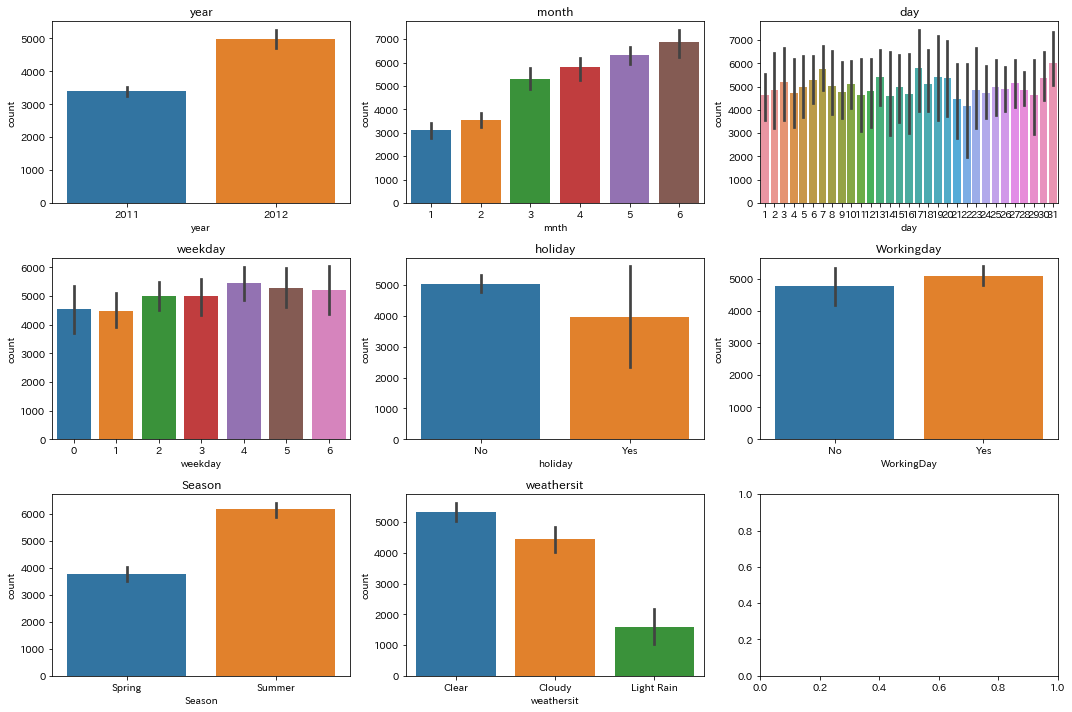

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.barplot(x='year', y='count', data=df, ax=axes[0, 0])
sns.barplot(x='mnth', y='count', data=df.iloc[365:], ax=axes[0, 1])
sns.barplot(x='day', y='count', data=df.iloc[365:], ax=axes[0, 2])
sns.barplot(x='weekday', y='count', data=df.iloc[365:], ax=axes[1, 0])
sns.barplot(x='holiday', y='count', data=df.iloc[365:], ax=axes[1, 1])
sns.barplot(x='WorkingDay', y='count', data=df.iloc[365:], ax=axes[1, 2])
sns.barplot(x='Season', y='count', data=df.iloc[365:], ax=axes[2, 0])
sns.barplot(x='weathersit', y='count', data=df.iloc[365:], ax=axes[2, 1])
axes[0, 0].set(title='year')
axes[0, 1].set(title='month')
axes[0, 2].set(title='day')
axes[1, 0].set(title='weekday')
axes[1, 1].set(title='holiday')
axes[1, 2].set(title='Workingday')
axes[2, 0].set(title='Season')
axes[2, 1].set(title='weathersit')
fig.tight_layout()

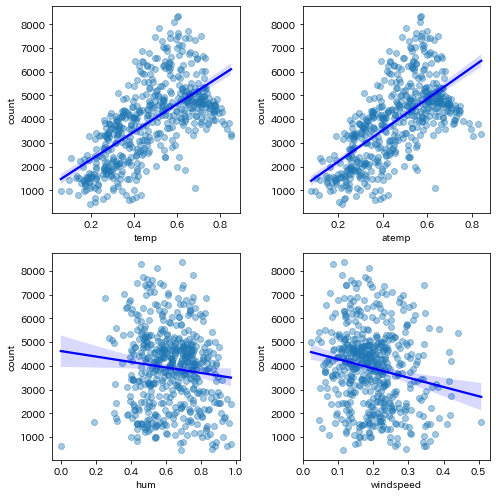

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.regplot(x='temp', y='count', data=df, ax=axes[0, 0], scatter_kws={'alpha': 0.4}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=df, ax=axes[0, 1], scatter_kws={'alpha': 0.4}, line_kws={'color': 'blue'})
sns.regplot(x='hum', y='count', data=df, ax=axes[1, 0], scatter_kws={'alpha': 0.4}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=df, ax=axes[1, 1], scatter_kws={'alpha': 0.4}, line_kws={'color': 'blue'})
fig.tight_layout()

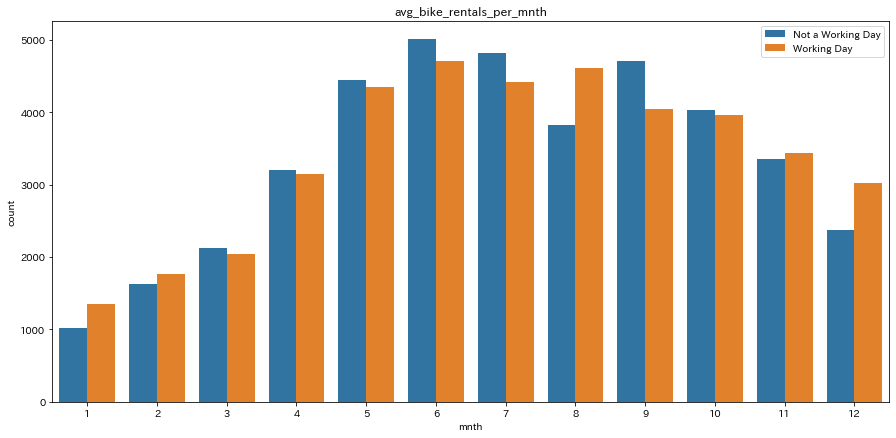

In [ ]:
fig, axes = plt.subplots(figsize=(15, 7))
group_mnth = pd.DataFrame(df[df['year']==2011].groupby(['mnth', 'WorkingDay'])['count'].mean()).reset_index()
sns.barplot(x='mnth', y='count', data=group_mnth, hue='WorkingDay', ax=axes)
axes.set(xlabel='mnth', ylabel='count', title='avg_bike_rentals_per_mnth')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

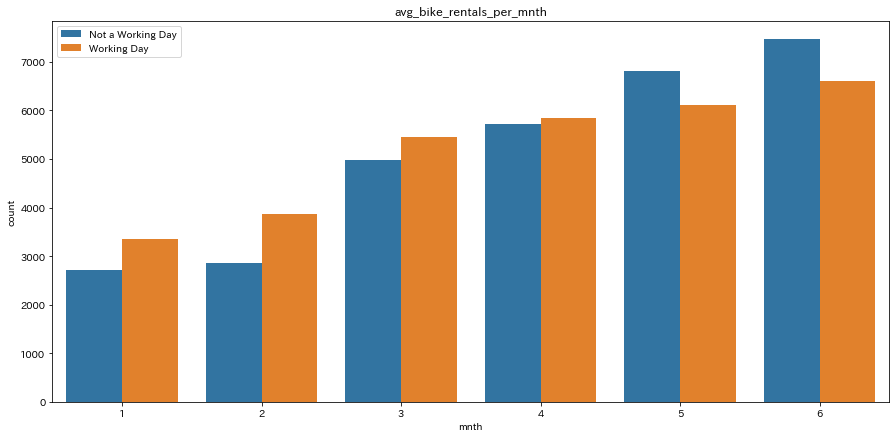

In [ ]:
fig, axes = plt.subplots(figsize=(15, 7))
group_mnth = pd.DataFrame(df[df['year']==2012].groupby(['mnth', 'WorkingDay'])['count'].mean()).reset_index()
sns.barplot(x='mnth', y='count', data=group_mnth, hue='WorkingDay', ax=axes)
axes.set(xlabel='mnth', ylabel='count', title='avg_bike_rentals_per_mnth')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

Text(0.5, 1.0, 'heatmap of df_2011')

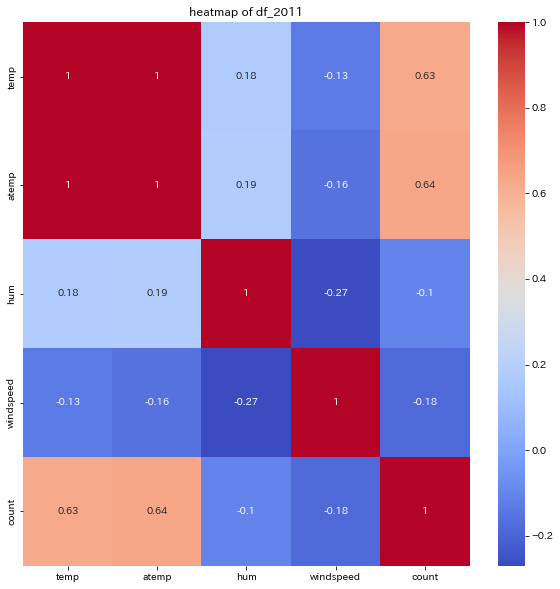

In [ ]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'count']].corr(), cmap='coolwarm', annot=True)
axes.set_title('heatmap of df_2011')

In [ ]:
df_2011 = df[df['year'] == 2011].copy()
df_2012 = df[df['year'] == 2012].copy()
df_2011

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count,day
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985,1
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801,2
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349,3
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562,4
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,ID-361,Spring,2011,2011-12-27,12,No,2,Yes,Cloudy,0.325000,0.327633,0.762500,0.188450,1162,27
361,ID-362,Spring,2011,2011-12-28,12,No,3,Yes,Clear,0.299130,0.279974,0.503913,0.293961,2302,28
362,ID-363,Spring,2011,2011-12-29,12,No,4,Yes,Clear,0.248333,0.263892,0.574167,0.119412,2423,29
363,ID-364,Spring,2011,2011-12-30,12,No,5,Yes,Clear,0.311667,0.318812,0.636667,0.134337,2999,30


In [ ]:
df_2012

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count,day
365,ID-366,Spring,2012,2012-01-01,1,No,0,No,Clear,0.370000,0.375621,0.692500,0.192167,2294,1
366,ID-367,Spring,2012,2012-01-02,1,Yes,1,No,Clear,0.273043,0.252304,0.381304,0.329665,1951,2
367,ID-368,Spring,2012,2012-01-03,1,No,2,Yes,Clear,0.150000,0.126275,0.441250,0.365671,2236,3
368,ID-369,Spring,2012,2012-01-04,1,No,3,Yes,Cloudy,0.107500,0.119337,0.414583,0.184700,2368,4
369,ID-370,Spring,2012,2012-01-05,1,No,4,Yes,Clear,0.265833,0.278412,0.524167,0.129987,3272,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498,9
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598,10
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664,11
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972,12


In [ ]:
df_2011['weathersit'] = df_2011['weathersit'].map({'Clear': 0, 'Cloudy': 1, 'Light Rain': 2})
df_2012['weathersit'] = df_2012['weathersit'].map({'Clear': 0, 'Cloudy': 1, 'Light Rain': 2})

In [ ]:
df_2011

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count,day
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,1,0.344167,0.363625,0.805833,0.160446,985,1
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,1,0.363478,0.353739,0.696087,0.248539,801,2
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,0,0.196364,0.189405,0.437273,0.248309,1349,3
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,0,0.200000,0.212122,0.590435,0.160296,1562,4
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,0,0.226957,0.229270,0.436957,0.186900,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,ID-361,Spring,2011,2011-12-27,12,No,2,Yes,1,0.325000,0.327633,0.762500,0.188450,1162,27
361,ID-362,Spring,2011,2011-12-28,12,No,3,Yes,0,0.299130,0.279974,0.503913,0.293961,2302,28
362,ID-363,Spring,2011,2011-12-29,12,No,4,Yes,0,0.248333,0.263892,0.574167,0.119412,2423,29
363,ID-364,Spring,2011,2011-12-30,12,No,5,Yes,0,0.311667,0.318812,0.636667,0.134337,2999,30


In [ ]:
# データセット作成
column = ['weekday', 'weathersit', 'atemp']
x_train = df_2011[column]
y_train = df_2011['count']
x_test = df_2012[column]
y_true = df_2012['count']

In [ ]:
# 11月のデータを学習
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 予測モデル
y_pred = lr.predict(x_test)
y_pred

array([3014.58399683, 2283.41088509, 1535.56038783,  924.08216475,
       2525.44783101, 2932.9859408 , 3270.77051666, 2797.11999078,
       1657.76438901, 2719.64861076, 1929.42349789, 2566.10347328,
       2373.96760329, 1993.57304068, 1698.62020877, 1904.35088463,
       2403.17944216, 2478.86565715, 1981.99382343, 1603.32255509,
       1347.09826112, 1106.48837018, 1630.57754483, 2905.86711685,
       2599.19250177, 2406.90577545, 2798.93490062, 2874.74410518,
       2381.80266544, 2346.87965206, 3103.9356679 , 3655.1624909 ,
       2670.84753953, 2742.83791798, 1948.82472639, 1735.40167963,
       2554.73817278, 2979.63626021, 1828.57205148, 2424.44879712,
       2049.77468977,  972.45502649, 1329.85443521, 2133.41895648,
       2216.65346214, 2948.53207294, 2247.70807761, 3002.85631482,
       3053.36185592, 1743.19306881, 2413.08493694, 2573.82602853,
       3200.89436913, 3546.47033417, 2771.80340174, 2439.95138162,
       2354.66501709, 2933.10328219, 2933.02936312, 2333.13060

In [ ]:
df_pred = pd.DataFrame({'dteday': df_2012['dteday'], 'count': y_true,'count_pred': y_pred})
df_pred

,dteday,count,count_pred
365,2012-01-01,2294,3014.583997
366,2012-01-02,1951,2283.410885
367,2012-01-03,2236,1535.560388
368,2012-01-04,2368,924.082165
369,2012-01-05,3272,2525.447831
...,...,...,...
525,2012-06-09,7498,4854.802369
526,2012-06-10,6598,4784.994242
527,2012-06-11,6664,4192.837680
528,2012-06-12,4972,3839.679157


Text(0, 0.5, 'y_true')

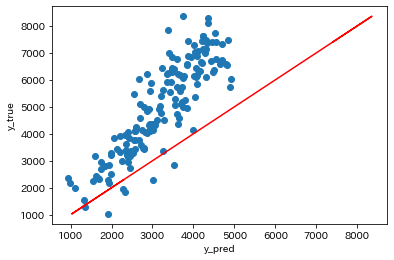

In [ ]:
plt.plot(y_true, y_true, color = 'red', label = 'x=y') 
plt.scatter(y_pred, y_true) 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 

In [ ]:
# 評価
print('決定係数(train):{:.3f}'.format(lr.score(x_train, y_train)))
print(f'R2: {r2_score(y_true, y_pred)}')
print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred))

決定係数(train):0.662
R2: -0.4571687683374228
RMSE:  2065.147139957513
MAPE:  0.35060947671838644


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse=False)
enc.fit(df_2011[['Season', 'holiday', 'WorkingDay', 'weathersit']])
onehot_feature = enc.transform(df_2011[['Season', 'holiday', 'WorkingDay', 'weathersit']])
pd.DataFrame(onehot_feature, index=df_2011.index, columns=enc.get_feature_names_out())

,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_0,weathersit_1,weathersit_2
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
361,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
362,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
363,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_2011_onehot = pd.DataFrame(onehot_feature, columns=enc.get_feature_names_out())
df_2011 = pd.merge(df_2011, df_2011_onehot, left_index=True, right_index=True)
df_2011

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,...,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_0,weathersit_1,weathersit_2
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,1,0.344167,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,1,0.363478,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,0,0.196364,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,0,0.200000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,0,0.226957,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,ID-361,Spring,2011,2011-12-27,12,No,2,Yes,1,0.325000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
361,ID-362,Spring,2011,2011-12-28,12,No,3,Yes,0,0.299130,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
362,ID-363,Spring,2011,2011-12-29,12,No,4,Yes,0,0.248333,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
363,ID-364,Spring,2011,2011-12-30,12,No,5,Yes,0,0.311667,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_2012_onehot = pd.DataFrame(enc.transform(df_2012[['Season', 'holiday', 'WorkingDay', 'weathersit']]), index=df_2012.index, columns=enc.get_feature_names_out())
df_2012 = pd.merge(df_2012, df_2012_onehot, left_index=True, right_index=True)
df_2012

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,...,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_0,weathersit_1,weathersit_2
365,ID-366,Spring,2012,2012-01-01,1,No,0,No,0,0.370000,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
366,ID-367,Spring,2012,2012-01-02,1,Yes,1,No,0,0.273043,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
367,ID-368,Spring,2012,2012-01-03,1,No,2,Yes,0,0.150000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
368,ID-369,Spring,2012,2012-01-04,1,No,3,Yes,1,0.107500,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
369,ID-370,Spring,2012,2012-01-05,1,No,4,Yes,0,0.265833,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,0,0.710833,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,0,0.726667,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,1,0.720833,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,1,0.653333,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
import lightgbm as lgb

In [ ]:
column = ['atemp', 'weathersit_0', 'weathersit_1', 'weathersit_2']
x_train2 = df_2011[column]
y_train2 = df_2011['count']
x_test2 = df_2012[column]
y_true2 = df_2012['count']

In [ ]:
model = lgb.LGBMRegressor()
model.fit(x_train2, y_train2)
y_pred2 = model.predict(x_test2)
y_pred2

array([2487.05317869, 2285.21748955, 1305.62697962, 1237.38069271,
       2283.2658679 , 3012.7790961 , 2830.8189957 , 3012.7790961 ,
       1730.82493257, 2906.08292987, 1841.30578388, 2455.33133406,
       1969.60666266, 1305.62697962, 1305.62697962, 1305.62697962,
       1764.7345939 , 2283.2658679 , 1305.62697962, 1255.57147054,
       1237.38069271, 1237.38069271, 1407.10527679, 3167.67979335,
       2115.63374254, 2183.7371189 , 2652.50544417, 2950.86763255,
       2283.2658679 , 2419.60207816, 2830.25104662, 4281.91311714,
       2461.75674024, 2906.08292987, 1841.30578388, 1818.68634005,
       2115.63374254, 3255.32234491, 1858.66931219, 2419.60207816,
       1813.19560267, 1019.21005288, 1305.62697962, 1332.0707584 ,
       2205.15490109, 3146.26538361, 2205.15490109, 3146.26538361,
       3146.26538361, 1858.66931219, 2283.2658679 , 2115.63374254,
       2890.77862338, 3663.34758817, 2668.67555099, 2317.51675237,
       2523.90231937, 3255.32234491, 3146.26538361, 2205.15152

In [ ]:
df_pred2 = pd.DataFrame({'dteday': df_2012['dteday'], 'count': y_true2,'count_pred': y_pred2})
df_pred2

,dteday,count,count_pred
365,2012-01-01,2294,2487.053179
366,2012-01-02,1951,2285.217490
367,2012-01-03,2236,1305.626980
368,2012-01-04,2368,1237.380693
369,2012-01-05,3272,2283.265868
...,...,...,...
525,2012-06-09,7498,4946.599961
526,2012-06-10,6598,4731.785312
527,2012-06-11,6664,4222.899188
528,2012-06-12,4972,4195.410388


Text(0, 0.5, 'y_true2')

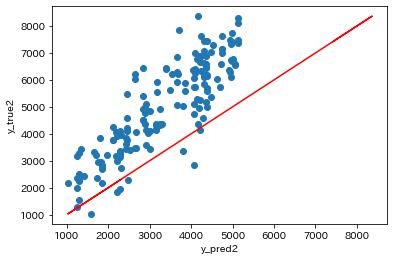

In [ ]:
plt.plot(y_true2, y_true2, color = 'red', label = 'x=y') 
plt.scatter(y_pred2, y_true2) 
plt.xlabel('y_pred2') 
plt.ylabel('y_true2') 

In [ ]:
print('MAPE: ', mean_absolute_percentage_error(y_true2, y_pred2))

MAPE:  0.3347496935970322
